<div class="alert alert-block alert-info">
    <h1><strong> Hey there, Hope you are doing great </strong></h1>

</div>

<div class="alert alert-block alert-info">
<h2>Thank you for checking out this project</h2>
<h2>Made by Vinamra</h2>
<h3>Project: We are provided with a datset of various information of the users of the bank and we have to predict that how many users are more probable to take a loan from the bank as the bank wants to increase its loan takers and assets.</h3>
<h3>Goal: to make prediction regarding most probable customers who are likely to take loan from the bank.</h3>
</div>

<div class="alert alert-block alert-success">
<h1>Marketing Campaign for Banking Products</h1>
</div>

From the User Data, we need to predict the potential costumers in case of taking the loans from the bank.


 <div class="alert alert-block alert-success">
<h1>Importing all the libraries required for the project</h1>
</div>

In [31]:
import numpy as np
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/vsulg/Anaconda3/Library/bin/graphviz'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<div class="alert alert-block alert-success">
<h1>Exploring the dataset</h1>
</div>

In [32]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data') 

In [33]:
data.shape

(5000, 14)

<div class="alert alert-block alert-warning">
<h3>Beginning of the Data</h3>
</div>

In [34]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<div class="alert alert-block alert-warning">
<h3>End of the Data</h3>
</div>

In [35]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<div class="alert alert-block alert-warning">
<h3>Information about the attributes</h3>
</div>

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<div class="alert alert-block alert-warning">
<h3>Generate descriptive statistics.</h3>
</div>

In [37]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<div class="alert alert-block alert-success">
<h1>Cleaning Data</h1>
</div>


<div class="alert alert-block alert-warning">
<h3>Relation between the Age and the Experience</h3>
</div>

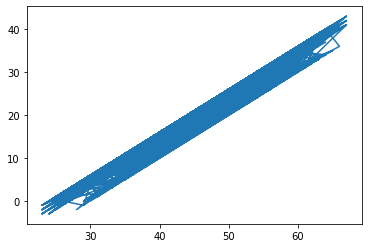

In [38]:
ages = data['Age']
experiences = data['Experience']

#Plotting Line graph between the two.
plt.plot(ages,experiences)
plt.show()

In [39]:
data['Experience'].corr(data['Age'])

0.9942148569683319

In [40]:
corr = data.corr(method = 'pearson')
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<div class="alert alert-block alert-danger">
        <h3>Since both of them are highly correlated. So, we can remove the experience column as it will not make any difference. </h3>
</div>

In [41]:
data = data.drop(['ID','Experience'],axis=1)


<div class="alert alert-block alert-warning">
<h3>Let's see the revised dataset</h3>
</div>

In [42]:
data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


 <div class="alert alert-block alert-success">
<h1>Let's analyze the data</h1>
</div>

In [43]:
data.nunique(axis=0)


Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

We can see that various columns have categorical values .

 <div class="alert alert-block alert-success">
<h1>Representation of the Data</h1>
</div>

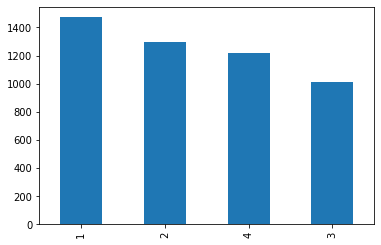

In [44]:
data['Family'].value_counts().plot(kind = 'bar')

We can see the insights about the family size of the customers from here and most of then customers are single.

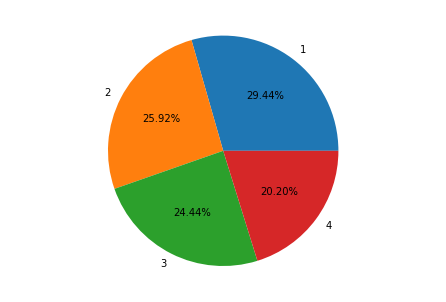

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1','2','3','4']
ax.pie(data['Family'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

Lets now check the education status of the customers.

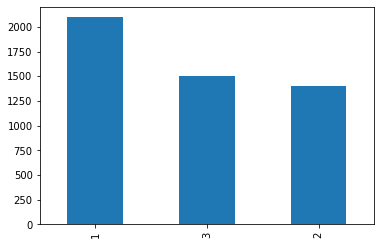

In [46]:
data['Education'].value_counts().plot(kind = 'bar')

So these are the insights from the education sector

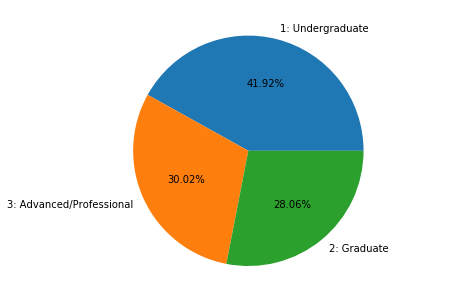

In [47]:
#Now seeing the Pie Chart of this distributuion
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1: Undergraduate','3: Advanced/Professional','2: Graduate']
ax.pie(data['Education'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

Lets check about Pesronal Loan of previous year.

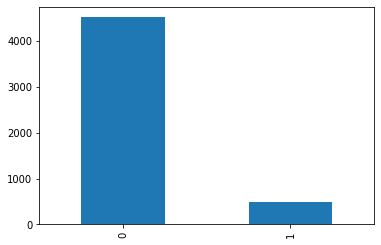

In [48]:
data['Personal Loan'].value_counts().plot(kind = 'bar')

Only 480 people from 5000 have taken the loan. That is only 9.6% of total customers took the loan.   

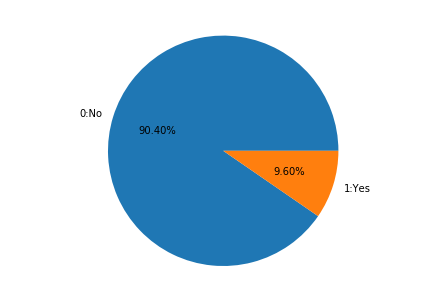

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data['Personal Loan'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

Lets check how many customers are having certificate of deposit account with the bank.

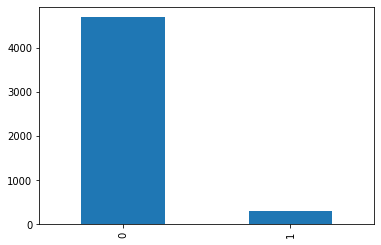

In [50]:
data['CD Account'].value_counts().plot(kind = 'bar')

Only 302 people from 5000 peope have the account.

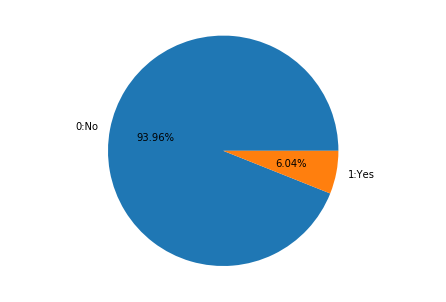

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data['CD Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

Lets check how many customers are having security accounts in the bank.

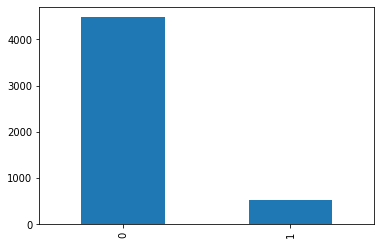

In [52]:
data['Securities Account'].value_counts().plot(kind = 'bar')

Lets check how many customers are usiing the online facilities and credit card facilities.

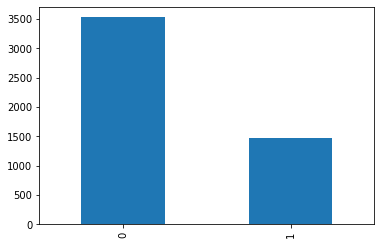

In [53]:
data['CreditCard'].value_counts().plot(kind = 'bar')


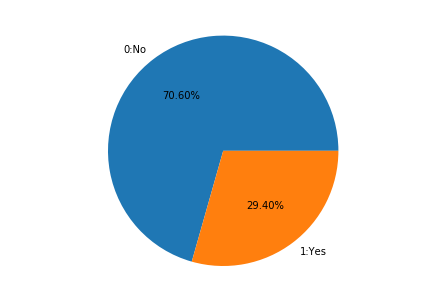

In [54]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(data['CreditCard'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

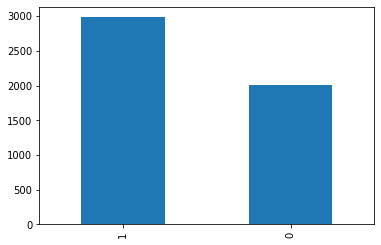

In [55]:
data['Online'].value_counts().plot(kind = 'bar')

It seems many people are using online facilities provided by bank but only few are using credit cards. Around 59% people are using online facilities provided by the bank and 29% peole are using the credit card facilties.

We can drop the zipcode column as it may not affect the personal loan of people.

In [56]:
data=data.drop('ZIP Code',axis = 1)

In [57]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


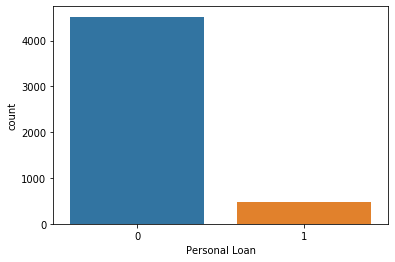

In [58]:
sns.countplot(data['Personal Loan'])

CCAvg is the monthly amount spend by the customer from credit card. Lets find out how many people are not using the card.

In [59]:
sum(data['CCAvg']==0)

106

Its pretty obvious that out of 108 users of credit card, only single person is not spending from credit card.

 <div class="alert alert-block alert-success">
<h1>Analyzing the Data using the Seaborn Library</h1>
</div>

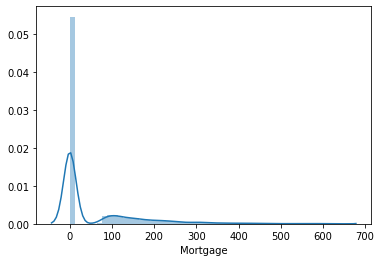

In [60]:
sns.distplot(data['Mortgage'])


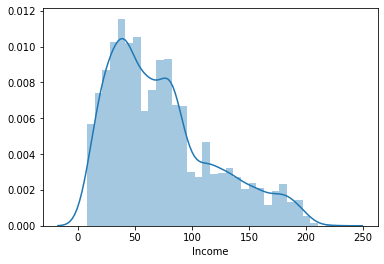

In [61]:
sns.distplot(data.Income)

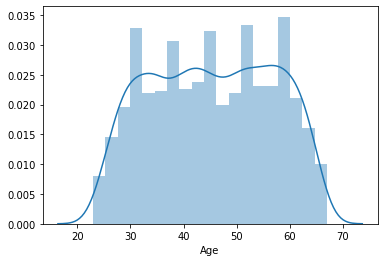

In [62]:
sns.distplot(data.Age)

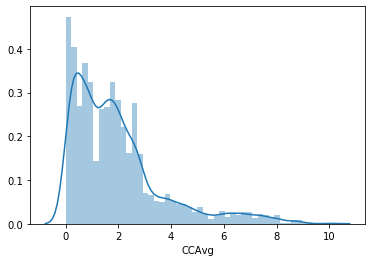

In [63]:
sns.distplot(data.CCAvg)

In [64]:
sum(data['Mortgage']==0)

3462

<div class="alert alert-block alert-warning">
<h3>3462 People have mortgage value of 0.</h3>
</div>

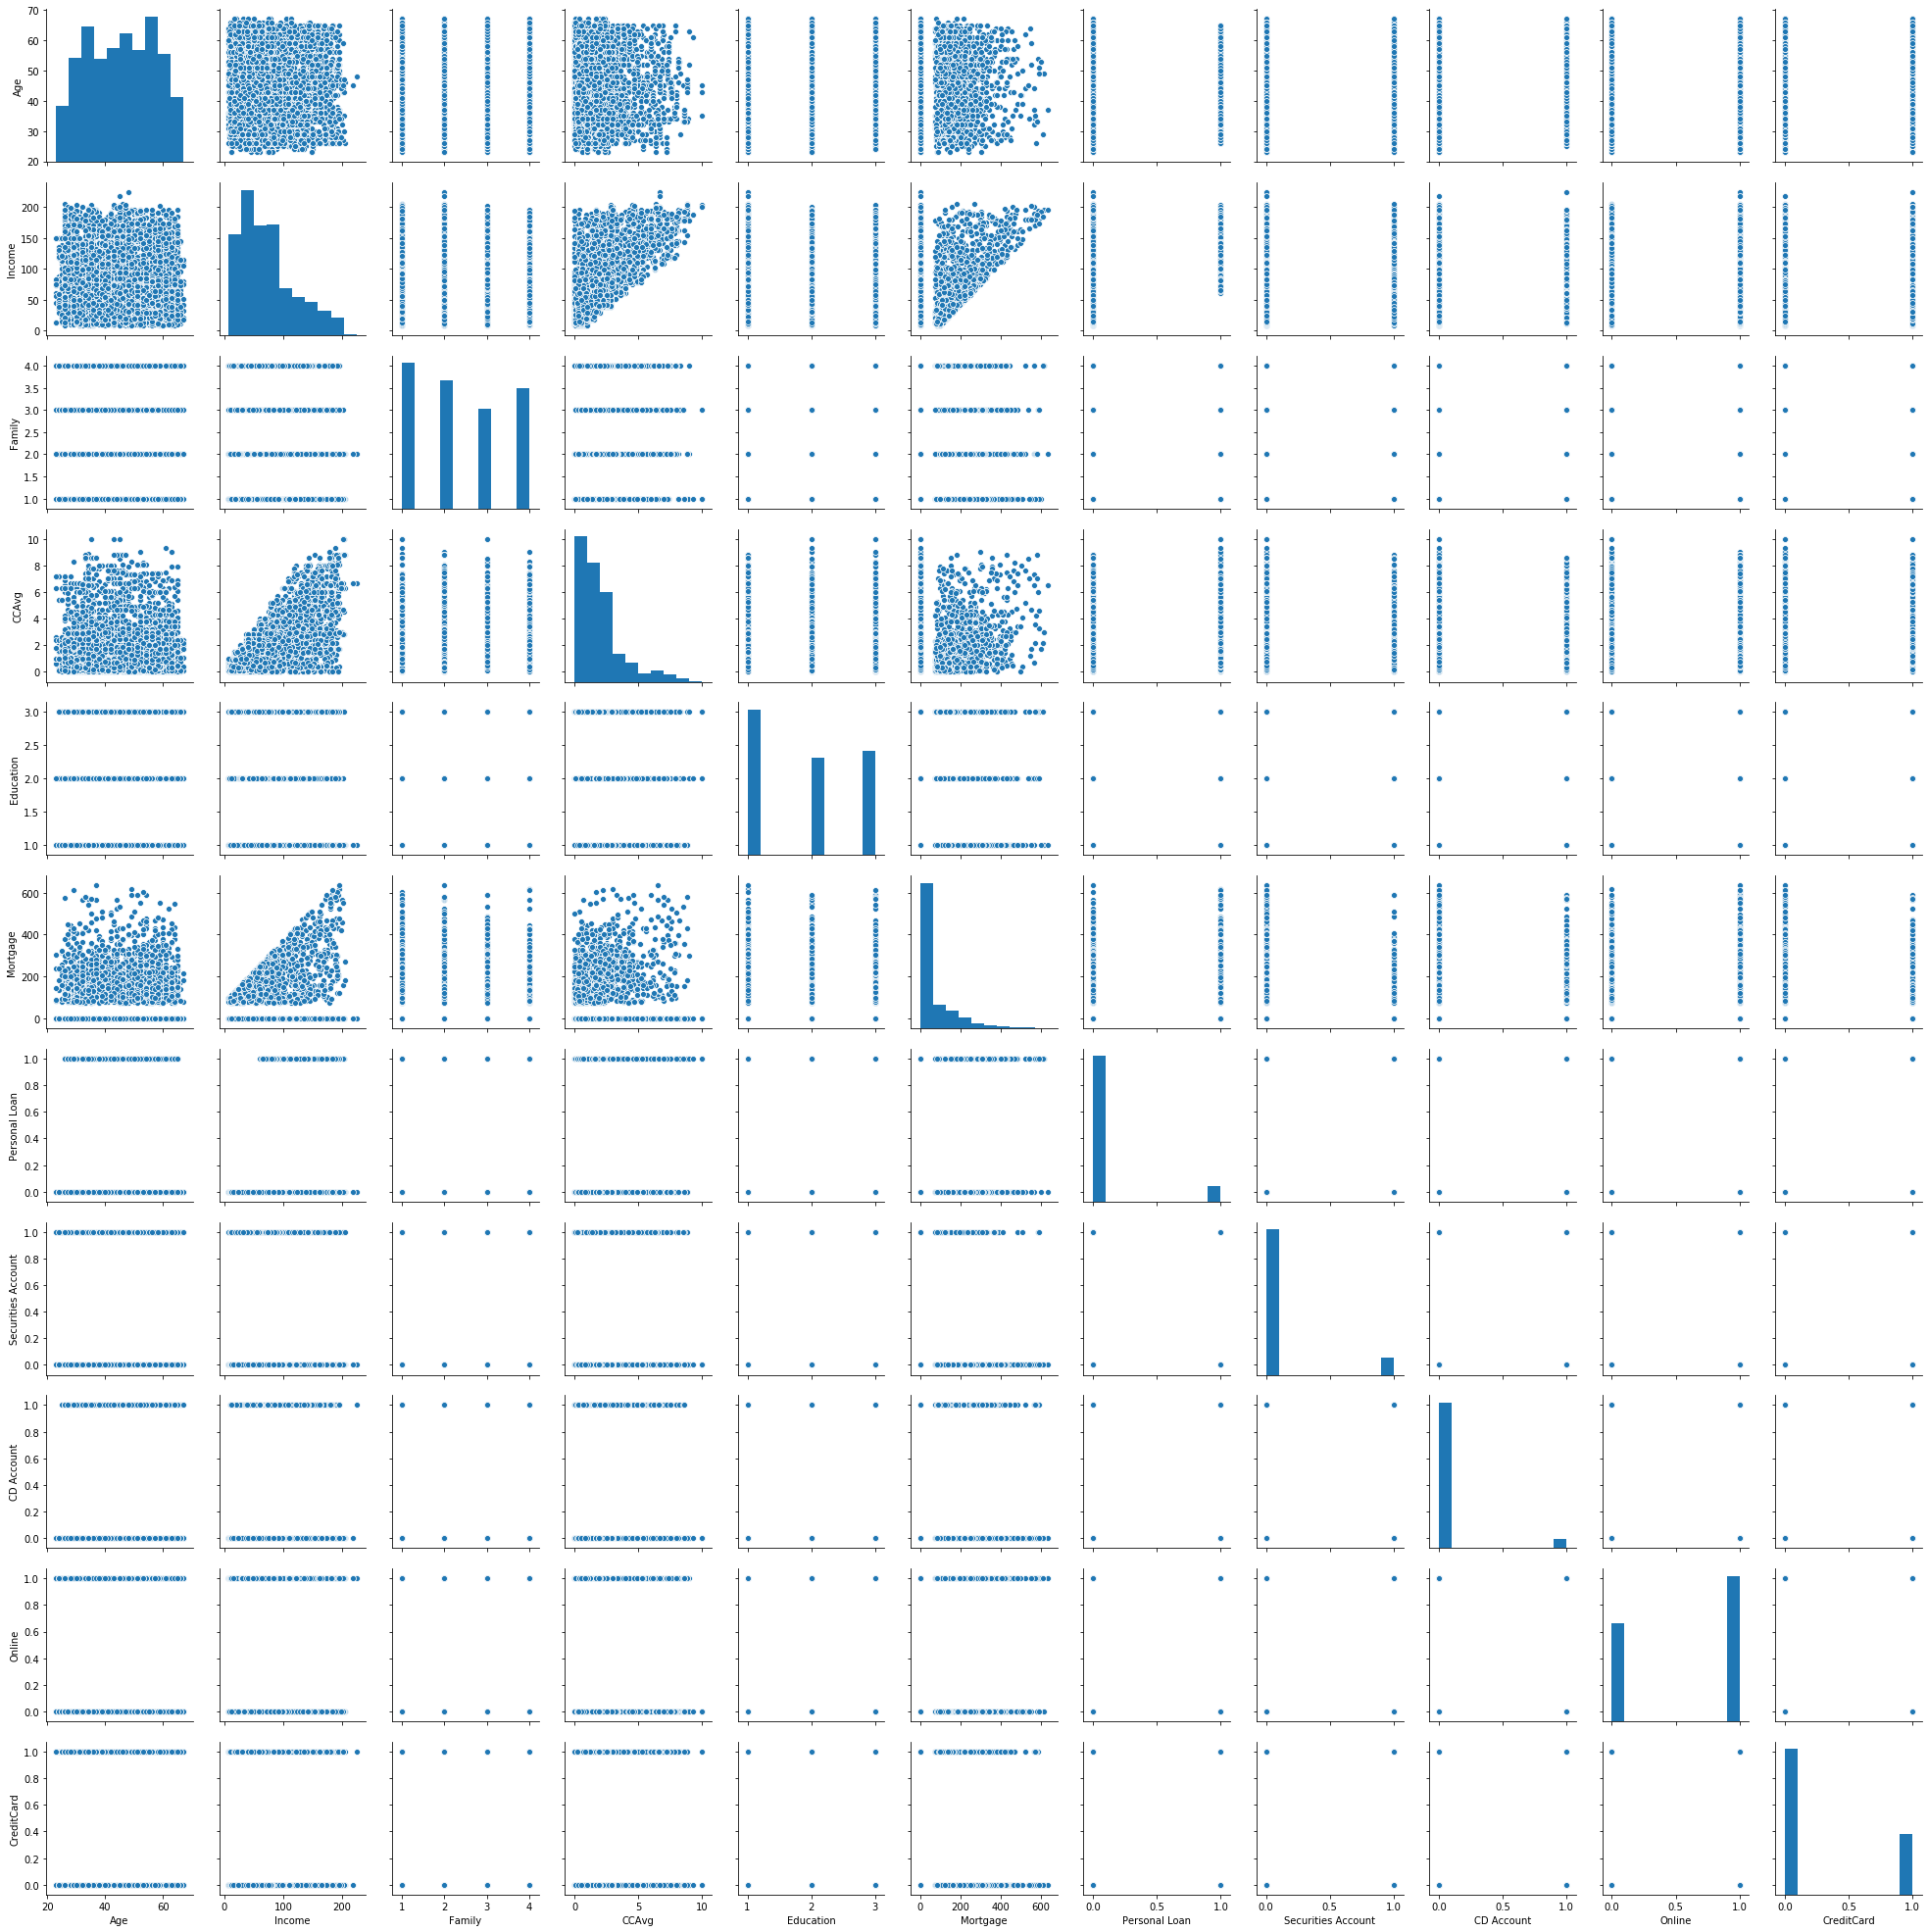

In [65]:
sns.pairplot(data)

In [66]:
sum(data.duplicated()==True)

13

Text(0, 0.5, 'education')

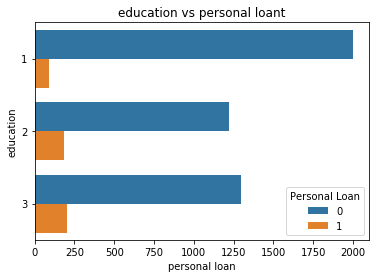

In [67]:
sns.countplot(y = 'Education', data = data, hue = 'Personal Loan')
plt.title('education vs personal loant')
plt.xlabel('personal loan')
plt.ylabel('education')

Text(0, 0.5, 'security account')

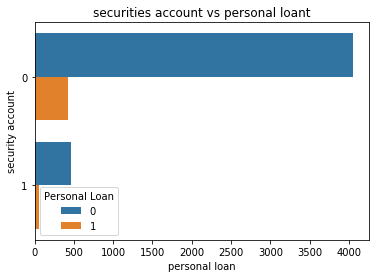

In [68]:
sns.countplot(y = 'Securities Account', data = data, hue = 'Personal Loan')
plt.title('securities account vs personal loant')
plt.xlabel('personal loan')
plt.ylabel('security account')


<div class="alert alert-block alert-warning">
<h3>Box Plot for the same</h3>
</div>

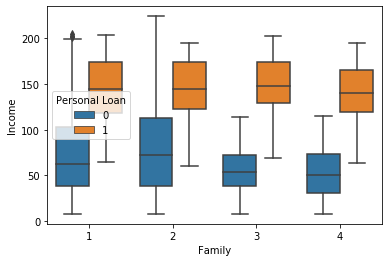

In [69]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data = data)

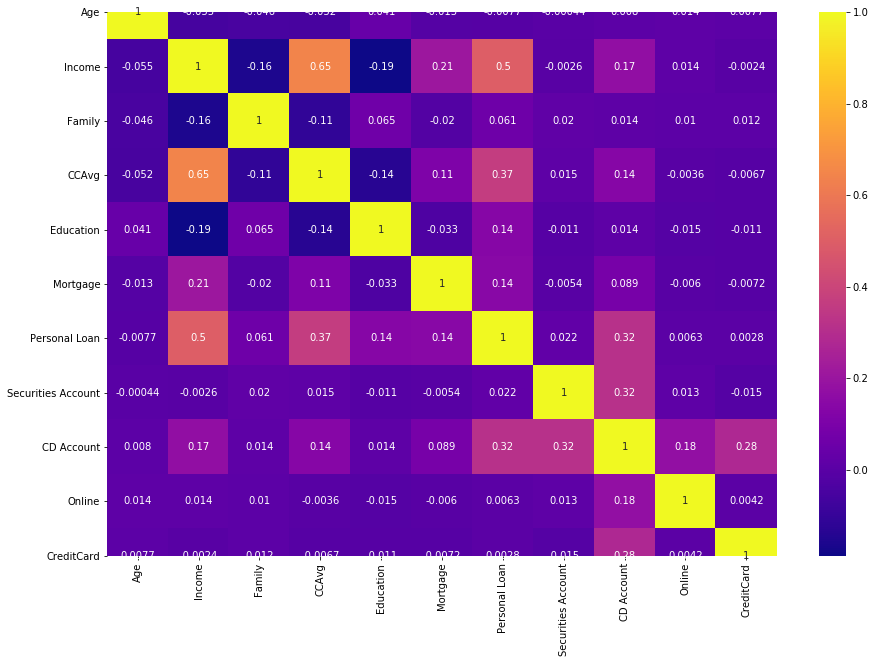

In [70]:
#Correlations Plot
fig.ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma',annot=True)
plt.show()

In [71]:
x = data[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
y = data['Personal Loan'].values


We will add Income and CCAvg in our features after scaling them.


 <div class="alert alert-block alert-success">
<h1>Normalizing of the Data</h1>
</div>

We have found out that we have income and ccavg value skewed so we have to transform them.

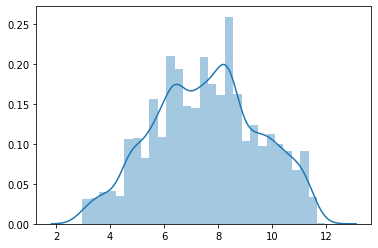

In [72]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(x['Income'].values.reshape(-1,1)))


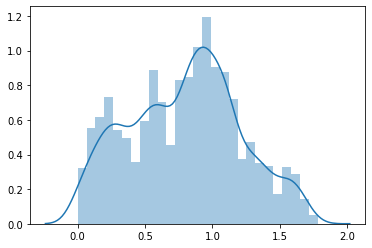

In [73]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(x['CCAvg'].values.reshape(-1,1)))

Now, ccavg and income are transformed. But now we have to transform the mortgage column. We have found that many values are 0 and other are only few.

In [74]:
x['MortgageN'] = pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)



 <div class="alert alert-block alert-success">
<h1>Spliting the Data into Training and the Testing Data</h1>
</div>

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)
scx.fit_transform(x_train)
scx.transform(x_test)
#scy.fit_transform(y_train.reshape(-1,1))
#scy.transform(y_test.reshape(-1,1))

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ...,  2.97177736,
        -0.24878345, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ...,  2.97177736,
        -0.24878345, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -0.33649896,
        -0.24878345,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  2.97177736,
        -0.24878345, -0.47490853]])


 <div class="alert alert-block alert-success">
<h1>Implementing Logistic Regression</h1>
</div>

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [77]:
model.fit(x_train,y_train)

C:\Users\vsulg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred = model.predict(x_test)

In [79]:
from sklearn import metrics

In [80]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

MAE: 0.051333333333333335
R2 score: 0.40849311701081603


<div class="alert alert-block alert-warning">
<h3>Efficiency of the Model</h3>
</div>

In [81]:
print(metrics.accuracy_score(y_test,y_pred))

0.9486666666666667


In [82]:
print(metrics.accuracy_score(y_train,model.predict(x_train)))

0.9494285714285714


In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1338   18]
 [  59   85]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.59      0.69       144

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500





<div class="alert alert-block alert-danger">
        <h3>Accurancy of the model is 94.8% but has a lot of false negative in confusion matrix </h3>
</div>

 <div class="alert alert-block alert-success">
<h1>Implementing SVM Model</h1>
</div>

In [85]:
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(x_train,y_train)

C:\Users\vsulg\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [86]:
y_pred = clf.predict(x_test)

In [87]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))


MAE: 0.07933333333333334
R2 score: 0.08585299901671573
Accuracy score for test data 0.9206666666666666


In [88]:
print(metrics.accuracy_score(y_train,model.predict(x_train)))

0.9494285714285714


In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1351    5]
 [ 114   30]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       0.86      0.21      0.34       144

    accuracy                           0.92      1500
   macro avg       0.89      0.60      0.65      1500
weighted avg       0.92      0.92      0.90      1500




<div class="alert alert-block alert-danger">
        <h3>Accurancy of the model is 92%,which is less than Logistic regression </h3>
</div>

 <div class="alert alert-block alert-success">
<h1>Implementing Decision Tree</h1>
</div>

In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)


In [93]:
y_pred = clf.predict(x_test)

In [94]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))


MAE: 0.018666666666666668
R2 score: 0.7849065880039331
Accuracy score for test data 0.9813333333333333


In [95]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [96]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1344   12]
 [  16  128]]


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.89      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



<div class="alert alert-block alert-danger">
        <h3>It has an accurancy of 97%, better than all till now</h3>
</div>

 <div class="alert alert-block alert-success">
<h1>Implementing Random Forest</h1>
</div>

In [98]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

C:\Users\vsulg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
y_pred = clf.predict(x_test)

In [100]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.013333333333333334
R2 score: 0.8463618485742379
Accuracy score for test data 0.9866666666666667


In [101]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [102]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1353    3]
 [  17  127]]


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



<div class="alert alert-block alert-danger">
        <h3>It has an accurancy of 98%, defeats the one from the Decision Tree</h3>
</div>

 <div class="alert alert-block alert-success">
<h1>Implementing Naive Bayes</h1>
</div>

In [104]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [105]:
y_pred = model.predict(x_test)

In [106]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.11266666666666666
R2 score: -0.2982423795476894
Accuracy score for test data 0.8873333333333333


In [107]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8805714285714286


In [108]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1243  113]
 [  56   88]]


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



<div class="alert alert-block alert-danger">
        <h3>It has an accurancy of 88%, comparitively less.</h3>
</div>

<div class="alert alert-block alert-success">
<h1>Implementing using KNN Algorithm</h1>
</div>

In [116]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [111]:
y_pred = neigh.predict(x_test)

In [112]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.07266666666666667
R2 score: 0.16267207472959677
Accuracy score for test data 0.9273333333333333


In [113]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8805714285714286


In [114]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1324   32]
 [  77   67]]


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1356
           1       0.68      0.47      0.55       144

    accuracy                           0.93      1500
   macro avg       0.81      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



<div class="alert alert-block alert-danger">
        <h3>It has an accurancy of 92%.</h3>
</div>

<div class="alert alert-block alert-success">
<h1>Final Conclusions(Efficiency of all the Models)</h1>
    <h1>*_*_*_*_*_*_*_*_*_*_*_*_</h1>
</div>





<div class="alert alert-block alert-info">
<h2> Efficency of Random Forest is 98%
</div>


<div class="alert alert-block alert-danger">
<h2> Efficency of Decision Tree is 97%
</div>

<div class="alert alert-block alert-info">
<h2> Efficency of Logistic Regression is 94%
</div>

<div class="alert alert-block alert-warning">
<h2> Efficency of KNN is 92%
</div>

<div class="alert alert-block alert-info">
<h2> Efficency of SVM is 92%
</div>


<div class="alert alert-block alert-warning">
<h2> Efficency of Naive Bayes is 88%
</div>

<div class="alert alert-block alert-success">
<h1>So we have accomplished the goal to predict the likelihood of a liability customer buying personal loans.</h1>
    <h1>*_*_*_*_*_*_*_*_*_*_*_*_</h1>
</div>


<div class="alert alert-block alert-success">
<h1>*_*_*_*_*_*_*_*_*_*_*_*_</h1>
<h1>Business Understanding</h1>
    <h3>We have built the model to tackle the problem to predict the likelihood of a customer buying the personal loans and we understand that any task always accomplishes a pattern which it follows, i.e the particular niche of the people are interested in getting the loans and thus it is important for the banks or the services to target the particular niche of people who have the most similar parameters and by which they can accomplish the described task easily.
    <h1>_*_*_*_*_*_*_*_*_*_*_*_*</h1>
</div>


<div class="alert alert-block alert-success">
<h2>*****************</h2><h1>THANK YOU!!!</h1><h2>*****************</h2>
</div>